In [ ]:
# ADD 3 OBSERVABLE TRENDS: 2018-03-23 21:48
# CNN is the media with worst value on sentiment analysis. Most of tweets are about school shootting in schools.
# CBS is the media with best value on sentiment analysis. Most of tweets are about sports, shows and movies.
# FOX and The New York times have many tweets that cannot be determined as positive or negative.

# Dependencies
import tweepy
import json
import numpy as np
import pprint
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

#Libray for sentiment analysis
from config import consumer_key,consumer_secret,access_token,access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [17]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [18]:
tweet_ls=[]
compound_ls=[]
positive_ls=[]
negative_ls=[]
neutral_ls=[]

# Target User
target_user = ["@BBC","@CBS","@CNN","@FOXTV","@nytimes"]


for user in target_user: 

    counter =1
    
    # Pagination (to get 100 tweets) 
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)

           # Loop through all tweets
        for tweet in public_tweets:
            
             # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            tweet_ls.append({"Target": tweet["user"]["name"], 
                            "Tweet":tweet["text"],
                            "Date":tweet["created_at"],
                            "Compound": compound,
                            "Positive": pos,
                            "Negative": neu,
                            "Neutral": neg,
                            "Tweets Ago": counter})

            # Add to counter 
            counter = counter + 1


In [19]:
# Convert sentiments to DataFrame
tweet_df = pd.DataFrame.from_dict(tweet_ls)

tweet_df.sort_values(by='Date', ascending=False)

tweet_df.head()

,Compound,Date,Negative,Neutral,Positive,Target,Tweet,Tweets Ago
0,0.000,Fri Mar 23 19:07:00 +0000 2018,1.000,0.000,0.0,BBC,"RT @BBCOne: .@GaryLineker, @OreOduba, @ThisisD...",1
1,-0.296,Fri Mar 23 18:03:04 +0000 2018,0.864,0.136,0.0,BBC,From @taylorswift13 to @Beyonce: these are the...,2
2,0.000,Fri Mar 23 17:33:03 +0000 2018,1.000,0.000,0.0,BBC,"Tonight, @GaryLineker, @ThisisDavina and @OreO...",3
3,0.000,Fri Mar 23 17:02:01 +0000 2018,1.000,0.000,0.0,BBC,"Your week, as told by @louistheroux. 📆😂\nhttps...",4
4,0.000,Fri Mar 23 16:27:45 +0000 2018,1.000,0.000,0.0,BBC,RT @BBCWales: A #DanceForParkinsons session wi...,5


In [20]:
 # Save the DataFrame as a csv
tweet_df.to_csv("output/Sentiment_Analysis_Media_Data.csv",
                     encoding="utf-8", index=False)

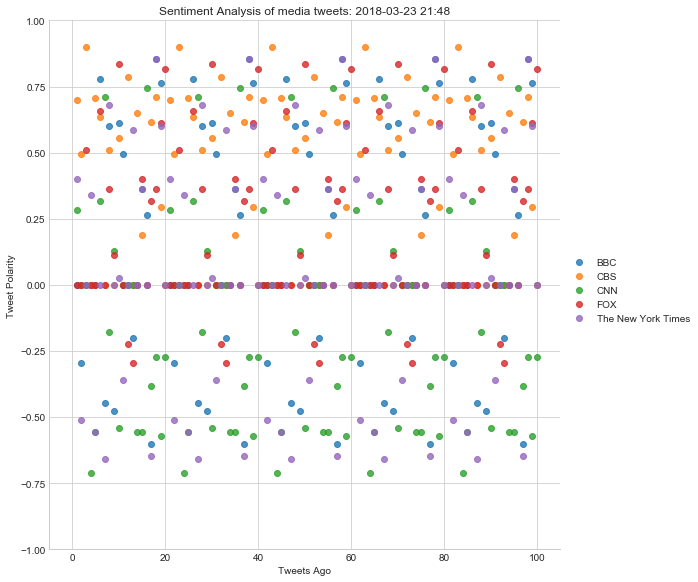

In [21]:
#Scatter plot
import datetime
now = datetime.datetime.now()
now=now.strftime("%Y-%m-%d %H:%M")

g=sns.lmplot('Tweets Ago', 'Compound', data=tweet_df, hue='Target', fit_reg=False, size=8,legend=True)

# title
g._legend.set_title('')

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of media tweets: {now}")

sns.set_style("darkgrid")

plt.xlim([0-5, 100+5])
plt.ylim([-1.00, 1.00])


# Show plot
plt.show()

# Save the figure
plt.savefig("output/SentimentAnalysis_Scatter.png")

In [22]:
#Group by Target, aggregation average by Compound 
tweet_group_df = tweet_df.groupby(["Target"])['Compound'].agg(['mean']).sort_index().reset_index()
tweet_group_df = tweet_group_df.rename(columns={"mean":"Tweet Polarity"})
tweet_group_df.head()

,Target,Tweet Polarity
0,BBC,0.135335
1,CBS,0.387445
2,CNN,-0.121020
3,FOX,0.223150
4,The New York Times,0.055650


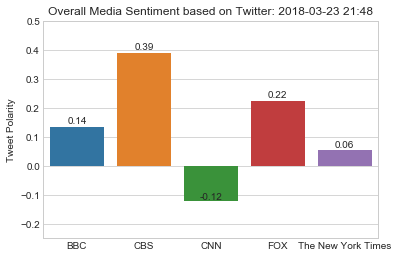

In [23]:
#Bar plot average values by media

sns.set_style("whitegrid")
ax = sns.barplot(x="Target", y="Tweet Polarity", data=tweet_group_df)


def autolabel(rects, labels=None, height_factor=1.05):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

autolabel(ax.patches, labels=round(tweet_group_df["Tweet Polarity"],2), height_factor=1.02)
plt.ylim([-0.25, 0.50])

plt.xlabel("")
plt.ylabel("Tweet Polarity")
plt.title(f"Overall Media Sentiment based on Twitter: {now}")

plt.show()

# Save the figure
plt.savefig("output/OverallMediaSentiment_Bar.png")